# Виузализация кейсов во времени  / visualisation case in time

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import date
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 def printmd(string):
    display(Markdown(string))

In [3]:
events = pd.read_csv('res2.csv',parse_dates=['dt'], delimiter=',')
events

,id,stages,dt,users
0,0.0,Stage_0,2019-12-01,Oliver
1,0.0,Stage_3,2019-12-02,Liam
2,0.0,Stage_5,2019-12-05,Emma
3,0.0,Stage_2,2019-12-11,Patricia
4,0.0,Stage_7,2019-12-17,Callum
...,...,...,...,...
4456,999.0,Stage_0,2019-12-01,Oliver
4457,999.0,Stage_2,2019-12-05,Patricia
4458,999.0,Stage_3,2019-12-11,Amelia
4459,999.0,Stage_5,2019-12-15,Emma


In [4]:
events['dt'] = pd.to_datetime(events['dt'])
events['dt']

0      2019-12-01
1      2019-12-02
2      2019-12-05
3      2019-12-11
4      2019-12-17
          ...    
4456   2019-12-01
4457   2019-12-05
4458   2019-12-11
4459   2019-12-15
4460   2019-12-23
Name: dt, Length: 4461, dtype: datetime64[ns]

In [5]:
case_starts_ends = events.pivot_table(index='id', aggfunc={'dt': ['min', 'max']})
case_starts_ends = case_starts_ends.reset_index()
case_starts_ends.columns = ['id', 'caseend', 'casestart']
events = events.merge(case_starts_ends, on='id')
events['relativetime'] = events['dt'] - events['casestart']
events.head()

,id,stages,dt,users,caseend,casestart,relativetime
0,0.0,Stage_0,2019-12-01,Oliver,2019-12-17,2019-12-01,0 days
1,0.0,Stage_3,2019-12-02,Liam,2019-12-17,2019-12-01,1 days
2,0.0,Stage_5,2019-12-05,Emma,2019-12-17,2019-12-01,4 days
3,0.0,Stage_2,2019-12-11,Patricia,2019-12-17,2019-12-01,10 days
4,0.0,Stage_7,2019-12-17,Callum,2019-12-17,2019-12-01,16 days


In [6]:
events['stages'] = events['stages'].apply(lambda x: x.strip())

In [7]:
delimiter = '___'

makeEventString = lambda x: delimiter.join(x)
makeEventString.__name__ = 'makeEventString'

numEvents = lambda x: len(x)
numEvents.__name__ = 'numEvents'


caselogs = events.pivot_table(index='id', aggfunc={'stages': [makeEventString, numEvents]})
caselogs = caselogs.reset_index()
caselogs.columns = ['id', 'stages_sequence', 'numstages']

events = pd.merge(events, caselogs, on='id')
events['caselength'] = events['caseend'] - events['casestart']

events.head()

,id,stages,dt,users,caseend,casestart,relativetime,stages_sequence,numstages,caselength
0,0.0,Stage_0,2019-12-01,Oliver,2019-12-17,2019-12-01,0 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days
1,0.0,Stage_3,2019-12-02,Liam,2019-12-17,2019-12-01,1 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days
2,0.0,Stage_5,2019-12-05,Emma,2019-12-17,2019-12-01,4 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days
3,0.0,Stage_2,2019-12-11,Patricia,2019-12-17,2019-12-01,10 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days
4,0.0,Stage_7,2019-12-17,Callum,2019-12-17,2019-12-01,16 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days


In [8]:
 ## Get day of week
events['weekday'] = events['dt'].apply(lambda x: x.weekday())
events['date'] = events['dt'].apply(lambda x: x.date())
events['startdate'] = events['casestart'].apply(lambda x: x.date())
events['hour'] = events['dt'].apply(lambda x: x.time().hour)
## Get relative times in more friendly terms
events['relativetime_s'] = events['relativetime'].dt.seconds + 86400*events['relativetime'].dt.days
events['relativedays'] = events['relativetime'].dt.days

In [9]:
 events.head()

,id,stages,dt,users,caseend,casestart,relativetime,stages_sequence,numstages,caselength,weekday,date,startdate,hour,relativetime_s,relativedays
0,0.0,Stage_0,2019-12-01,Oliver,2019-12-17,2019-12-01,0 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,6,2019-12-01,2019-12-01,0,0,0
1,0.0,Stage_3,2019-12-02,Liam,2019-12-17,2019-12-01,1 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,0,2019-12-02,2019-12-01,0,86400,1
2,0.0,Stage_5,2019-12-05,Emma,2019-12-17,2019-12-01,4 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,3,2019-12-05,2019-12-01,0,345600,4
3,0.0,Stage_2,2019-12-11,Patricia,2019-12-17,2019-12-01,10 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,2,2019-12-11,2019-12-01,0,864000,10
4,0.0,Stage_7,2019-12-17,Callum,2019-12-17,2019-12-01,16 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,1,2019-12-17,2019-12-01,0,1382400,16


In [10]:
printmd('**Minimum number of events per case**: {}'.format(min(events['id'].value_counts())))

**Minimum number of events per case**: 1

In [11]:
printmd('**Activity with lowest occurrence**: {}'.format(events['id'].value_counts().sort_values().idxmin()))

**Activity with lowest occurrence**: 678.0

In [12]:
# выборка 600 кейсов
case = events['id'].unique()
selected_case = case[0:600]
idX = events[events['id'].isin(selected_case)]

In [13]:
idX

,id,stages,dt,users,caseend,casestart,relativetime,stages_sequence,numstages,caselength,weekday,date,startdate,hour,relativetime_s,relativedays
0,0.0,Stage_0,2019-12-01,Oliver,2019-12-17,2019-12-01,0 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,6,2019-12-01,2019-12-01,0,0,0
1,0.0,Stage_3,2019-12-02,Liam,2019-12-17,2019-12-01,1 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,0,2019-12-02,2019-12-01,0,86400,1
2,0.0,Stage_5,2019-12-05,Emma,2019-12-17,2019-12-01,4 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,3,2019-12-05,2019-12-01,0,345600,4
3,0.0,Stage_2,2019-12-11,Patricia,2019-12-17,2019-12-01,10 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,2,2019-12-11,2019-12-01,0,864000,10
4,0.0,Stage_7,2019-12-17,Callum,2019-12-17,2019-12-01,16 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,1,2019-12-17,2019-12-01,0,1382400,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,598.0,Stage_8,2019-12-29,Isabella,2019-12-29,2019-12-01,28 days,Stage_0___Stage_2___Stage_3___Stage_7___Stage_8,5,28 days,6,2019-12-29,2019-12-01,0,2419200,28
2707,599.0,Stage_5,2019-12-01,Emma,2019-12-01,2019-12-01,0 days,Stage_5,1,0 days,6,2019-12-01,2019-12-01,0,0,0
2708,600.0,Stage_0,2019-12-01,Oliver,2019-12-11,2019-12-01,0 days,Stage_0___Stage_2___Stage_5,3,10 days,6,2019-12-01,2019-12-01,0,0,0
2709,600.0,Stage_2,2019-12-02,Patricia,2019-12-11,2019-12-01,1 days,Stage_0___Stage_2___Stage_5,3,10 days,0,2019-12-02,2019-12-01,0,86400,1


In [14]:
idnums = [int(e) for e in events['id'].apply(lambda x: x)]
usersnums = [i for (i, e) in enumerate(events['users'])]

In [15]:
# отсортированная выборка по стадияем и протяженности кейсов
ordered_idX = idX.sort_values(by=['stages', 'relativedays'], ascending=False)
ordered_idX

,id,stages,dt,users,caseend,casestart,relativetime,stages_sequence,numstages,caselength,weekday,date,startdate,hour,relativetime_s,relativedays
213,46.0,Stage_9,2020-01-14,Mia,2020-01-14,2019-12-01,44 days,Stage_0___Stage_2___Stage_3___Stage_4___Stage_...,8,44 days,1,2020-01-14,2019-12-01,0,3801600,44
1733,386.0,Stage_9,2020-01-09,Barbara,2020-01-09,2019-12-01,39 days,Stage_0___Stage_2___Stage_1___Stage_3___Stage_...,8,39 days,3,2020-01-09,2019-12-01,0,3369600,39
1272,281.0,Stage_9,2020-01-08,Barbara,2020-01-08,2019-12-01,38 days,Stage_0___Stage_2___Stage_4___Stage_3___Stage_...,7,38 days,2,2020-01-08,2019-12-01,0,3283200,38
1974,439.0,Stage_9,2020-01-07,Barbara,2020-01-07,2019-12-01,37 days,Stage_0___Stage_2___Stage_3___Stage_7___Stage_...,6,37 days,1,2020-01-07,2019-12-01,0,3196800,37
2379,528.0,Stage_9,2020-01-07,Barbara,2020-01-07,2019-12-01,37 days,Stage_0___Stage_2___Stage_3___Stage_7___Stage_...,7,37 days,1,2020-01-07,2019-12-01,0,3196800,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,592.0,Stage_0,2019-12-01,Oliver,2019-12-19,2019-12-01,0 days,Stage_0___Stage_1___Stage_2___Stage_3___Stage_6,5,18 days,6,2019-12-01,2019-12-01,0,0,0
2690,596.0,Stage_0,2019-12-01,Jake,2019-12-31,2019-12-01,0 days,Stage_0___Stage_2___Stage_3___Stage_4___Stage_...,6,30 days,6,2019-12-01,2019-12-01,0,0,0
2696,597.0,Stage_0,2019-12-01,Jake,2019-12-31,2019-12-01,0 days,Stage_0___Stage_2___Stage_3___Stage_5___Stage_...,6,30 days,6,2019-12-01,2019-12-01,0,0,0
2702,598.0,Stage_0,2019-12-01,Oliver,2019-12-29,2019-12-01,0 days,Stage_0___Stage_2___Stage_3___Stage_7___Stage_8,5,28 days,6,2019-12-01,2019-12-01,0,0,0


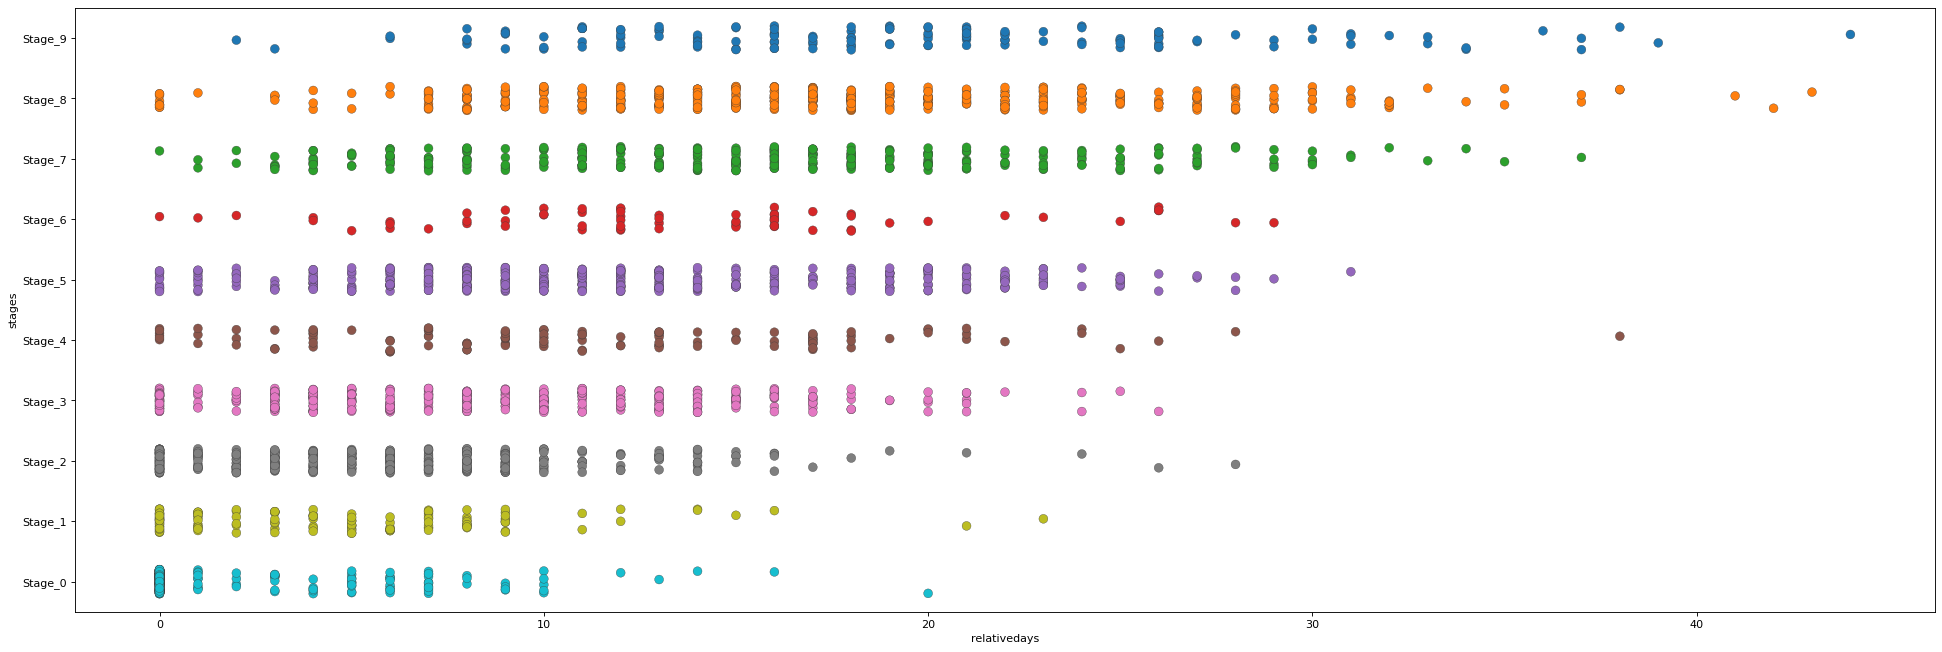

In [16]:
# выборка 600 штук
fig, ax = plt.subplots(figsize=(30,10), dpi= 80)
sns.stripplot(data=ordered_idX, x='relativedays', y='stages', jitter=0.2, size=8, ax=ax, linewidth=.3)
plt.show()

In [17]:
# целиком все данные
# выбираем только те кейсы строки где протяженность дней меньше 30
ordered = events[events['caselength'].dt.days < 30]

ordered

,id,stages,dt,users,caseend,casestart,relativetime,stages_sequence,numstages,caselength,weekday,date,startdate,hour,relativetime_s,relativedays
0,0.0,Stage_0,2019-12-01,Oliver,2019-12-17,2019-12-01,0 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,6,2019-12-01,2019-12-01,0,0,0
1,0.0,Stage_3,2019-12-02,Liam,2019-12-17,2019-12-01,1 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,0,2019-12-02,2019-12-01,0,86400,1
2,0.0,Stage_5,2019-12-05,Emma,2019-12-17,2019-12-01,4 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,3,2019-12-05,2019-12-01,0,345600,4
3,0.0,Stage_2,2019-12-11,Patricia,2019-12-17,2019-12-01,10 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,2,2019-12-11,2019-12-01,0,864000,10
4,0.0,Stage_7,2019-12-17,Callum,2019-12-17,2019-12-01,16 days,Stage_0___Stage_3___Stage_5___Stage_2___Stage_7,5,16 days,1,2019-12-17,2019-12-01,0,1382400,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,999.0,Stage_0,2019-12-01,Oliver,2019-12-23,2019-12-01,0 days,Stage_0___Stage_2___Stage_3___Stage_5___Stage_7,5,22 days,6,2019-12-01,2019-12-01,0,0,0
4457,999.0,Stage_2,2019-12-05,Patricia,2019-12-23,2019-12-01,4 days,Stage_0___Stage_2___Stage_3___Stage_5___Stage_7,5,22 days,3,2019-12-05,2019-12-01,0,345600,4
4458,999.0,Stage_3,2019-12-11,Amelia,2019-12-23,2019-12-01,10 days,Stage_0___Stage_2___Stage_3___Stage_5___Stage_7,5,22 days,2,2019-12-11,2019-12-01,0,864000,10
4459,999.0,Stage_5,2019-12-15,Emma,2019-12-23,2019-12-01,14 days,Stage_0___Stage_2___Stage_3___Stage_5___Stage_7,5,22 days,6,2019-12-15,2019-12-01,0,1209600,14


In [18]:
ordered = ordered.sort_values(by=['stages'], ascending=False)

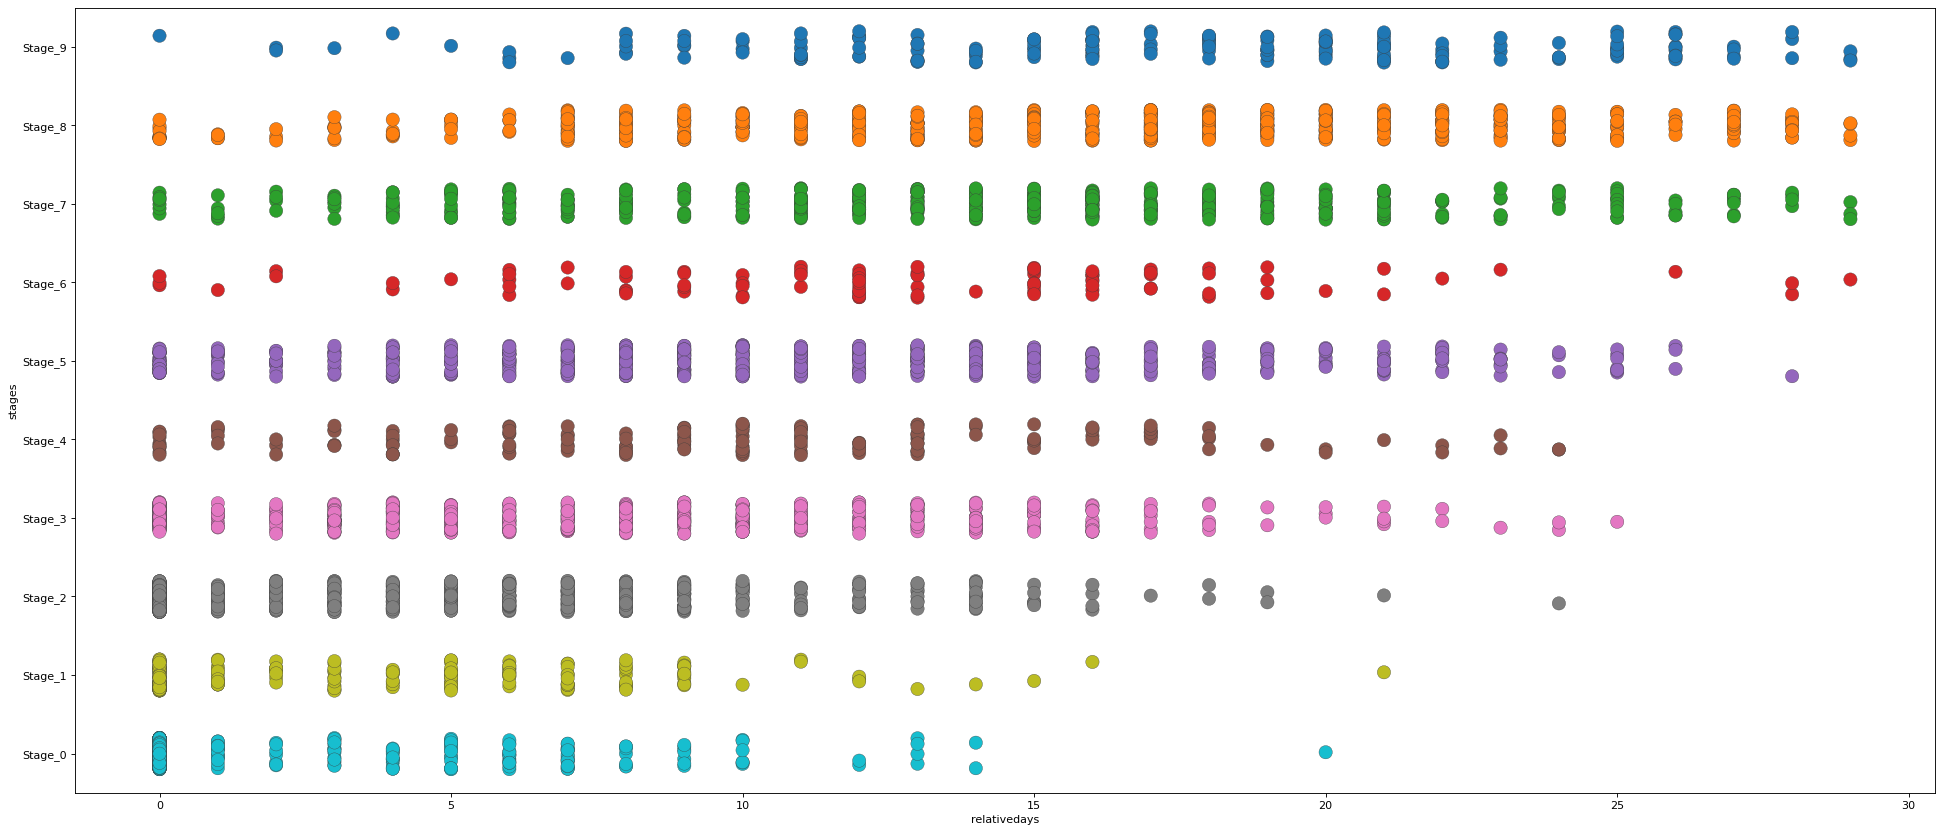

In [19]:
fig, ax = plt.subplots(figsize=(30, 13), dpi= 80)
sns.stripplot(data=ordered, x='relativedays', y='stages', jitter=0.2, size=12, ax=ax, linewidth=.3)
plt.show()